## Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

## Load and inspect the data

In [8]:
df = pd.read_csv("../data/processed/merged_data.csv")
df.shape, df.columns


((12202, 19),
 Index(['vaga_id', 'candidato_id', 'situacao', 'comentario', 'nome',
        'titulo_vaga', 'modalidade_vaga', 'cliente', 'sap',
        'nivel_profissional', 'idioma', 'competencias_tecnicas',
        'nivel_academico', 'ingles', 'espanhol', 'area_atuacao',
        'conhecimentos', 'cv', 'target'],
       dtype='object'))

In [9]:
df.head()

,vaga_id,candidato_id,situacao,comentario,nome,titulo_vaga,modalidade_vaga,cliente,sap,nivel_profissional,idioma,competencias_tecnicas,nivel_academico,ingles,espanhol,area_atuacao,conhecimentos,cv,target
0,4531,25364,Contratado pela Decision,Data de Inicio: 12/04/2021,Sra. Yasmin Fernandes,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Gonzalez and Sons,Não,Sênior,Nenhum,O recurso Peoplesoft tem como responsabilidade...,Ensino Superior Completo,Avançado,Intermediário,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",\n\nárea de atuação: lider de consultoria / ge...,1
1,4533,26338,Contratado pela Decision,NaN,Arthur Almeida,2021-2605708-Microfocus Application Life Cycle...,NaN,Barnes-Woods,Não,Sênior,Técnico,Arquiteto\n\nFoco na área e automação.\n\nRequ...,NaN,NaN,NaN,NaN,NaN,"solteiro, brasileiro, 21/06/1987\nhabilitação ...",1
2,4533,24645,Desistiu,Profissional desistiu da vaga. Motivo : Na ver...,Dante Sampaio,2021-2605708-Microfocus Application Life Cycle...,NaN,Barnes-Woods,Não,Sênior,Técnico,Arquiteto\n\nFoco na área e automação.\n\nRequ...,NaN,NaN,NaN,NaN,NaN,analista de teste/qa\n\nprofissional hands on ...,0
3,4534,26205,Desistiu,"profissional não atende ou responde ligações, ...",Isabella da Cruz,2021-2605711-Microfocus QTP - UFT Automation T...,NaN,Barnes-Woods,Não,Sênior,Técnico,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,NaN,NaN,"idade: 37 anos\n172 apto.2703, vila maria josé...",0
4,4534,26003,Não Aprovado pelo Cliente,"""Conversando com a candidata, foi exposto que ...",Maria Helena Peixoto,2021-2605711-Microfocus QTP - UFT Automation T...,NaN,Barnes-Woods,Não,Sênior,Técnico,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,NaN,NaN,solteira – 40 anos – brasileira\nitaquaquecetu...,0


## Exploratory Data Analysis (EDA)

In [10]:
# Verificar os valores únicos e frequências da coluna "situacao"
df['situacao'].value_counts()


situacao
Não Aprovado pelo Cliente         3492
Contratado pela Decision          2758
Desistiu                          2349
Não Aprovado pelo RH              1765
Não Aprovado pelo Requisitante     765
Sem interesse nesta vaga           576
Contratado como Hunting            226
Aprovado                           209
Desistiu da Contratação             59
Recusado                             2
Proposta Aceita                      1
Name: count, dtype: int64

In [11]:
# Definindo os valores
valores_sucesso = [
    "Contratado pela Decision",
    "Contratado como Hunting",
    "Proposta Aceita"
]

valores_excluir = [
    "Prospect", "Inscrito", "Encaminhado ao Requisitante",
    "Entrevista Técnica", "Entrevista com Cliente",
    "Em avaliação pelo RH", "Encaminhar Proposta",
    "Documentação PJ", "Documentação CLT", "Documentação Cooperado"
]

# Filtrar o dataset
df = df[~df["situacao"].isin(valores_excluir)]

# Criar a variável target
df["target"] = df["situacao"].apply(lambda x: 1 if x in valores_sucesso else 0)

# Verificar a distribuição final
df["target"].value_counts(normalize=True)


target
0    0.755368
1    0.244632
Name: proportion, dtype: float64

In [12]:
# Salvar o dataset final com target
df.to_csv('../data/processed/merged_data.csv', index=False)

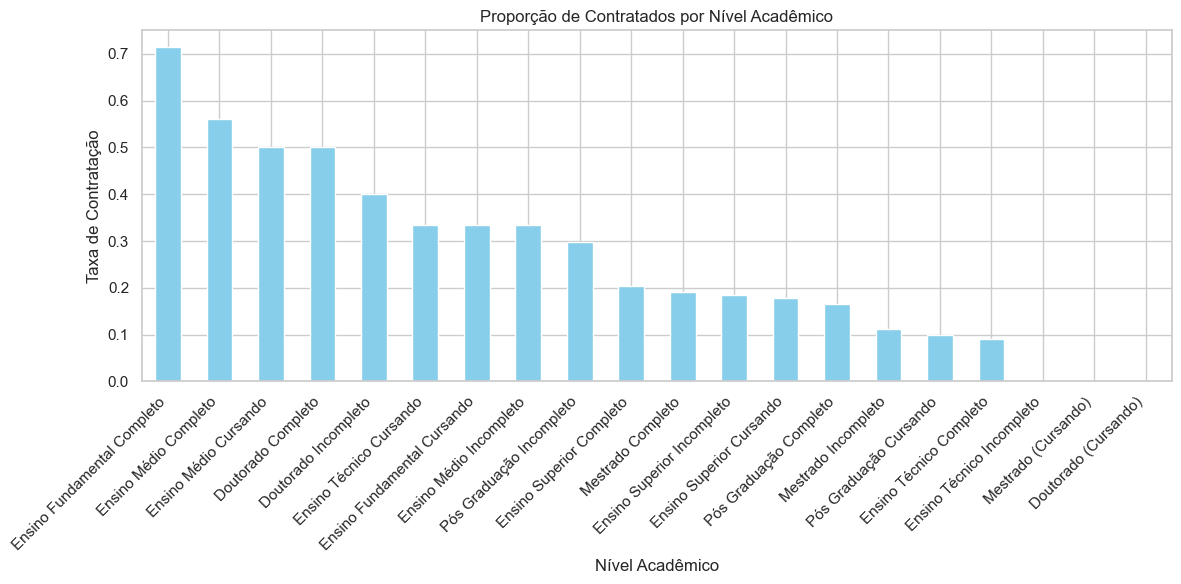

In [13]:
# Corrigir e padronizar os nomes dos níveis acadêmicos
df['nivel_academico'] = df['nivel_academico'].str.strip().str.title()

# Substituições manuais para uniformizar
df['nivel_academico'] = df['nivel_academico'].replace({
    'Ensino Medio Completo': 'Ensino Médio Completo',
    'Ensino Medio Incompleto': 'Ensino Médio Incompleto',
    'Ensino Tecnico Completo': 'Ensino Técnico Completo',
    'Ensino Tecnico Cursando': 'Ensino Técnico Cursando',
    'Ensino Superior Cursando ': 'Ensino Superior Cursando',
    'Pos Graduacao': 'Pós-Graduação',
    'Pos Graduacao Cursando': 'Pós-Graduação Cursando',
    'Doutorado Cursando': 'Doutorado (Cursando)',
    'Mestrado Cursando': 'Mestrado (Cursando)',
})

# Gerar gráfico atualizado
nivel_acad_target = df.groupby('nivel_academico')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
nivel_acad_target.plot(kind='bar', title='Proporção de Contratados por Nível Acadêmico', color='skyblue')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Nível Acadêmico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


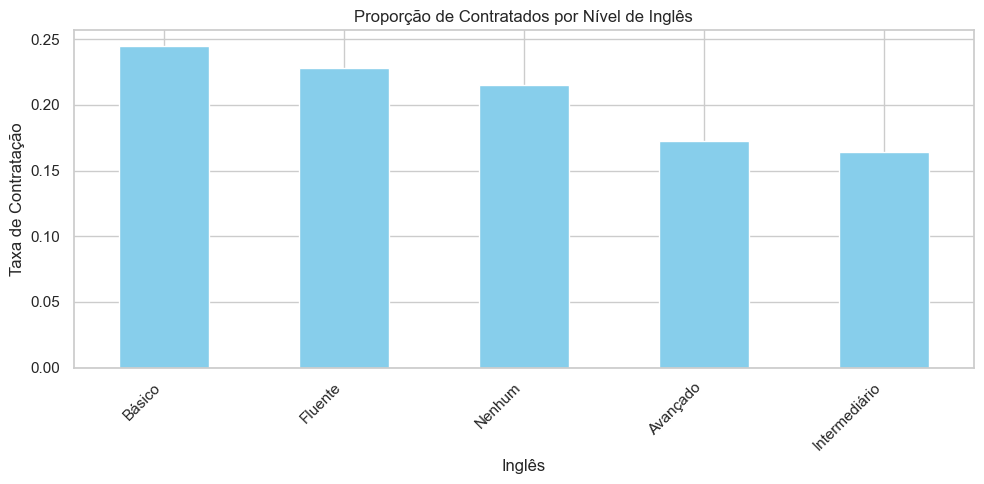

In [14]:
# Padronizar valores de idioma
df['ingles'] = df['ingles'].str.strip().str.title()
df['espanhol'] = df['espanhol'].str.strip().str.title()

# Proporção de contratação por nível de inglês
ingles_target = df.groupby('ingles')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ingles_target.plot(kind='bar', title='Proporção de Contratados por Nível de Inglês', color='skyblue')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Inglês')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


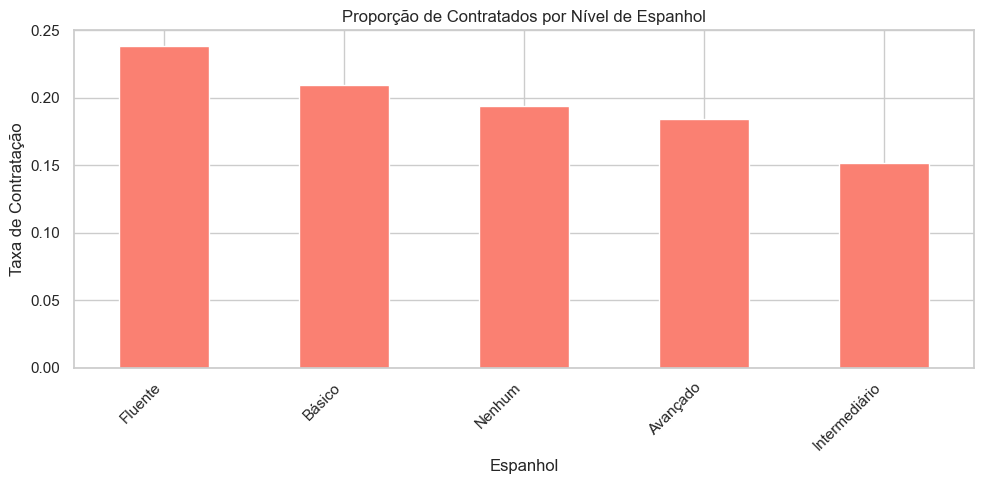

In [15]:
# Proporção de contratação por nível de espanhol
espanhol_target = df.groupby('espanhol')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
espanhol_target.plot(kind='bar', title='Proporção de Contratados por Nível de Espanhol', color='salmon')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Espanhol')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


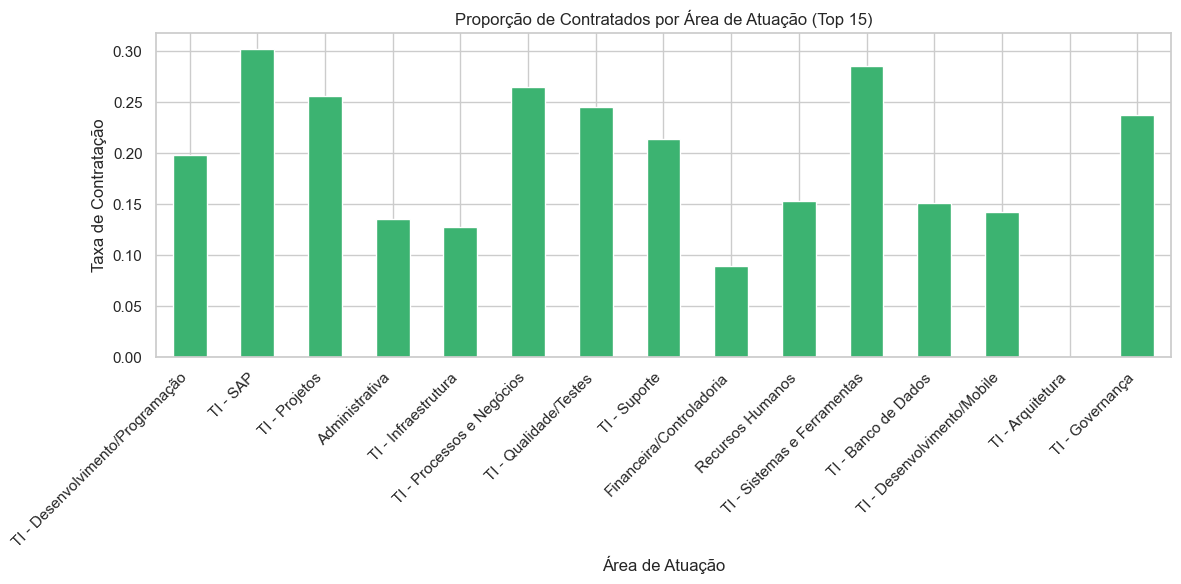

In [16]:
top_areas = (
    df.groupby('area_atuacao')['target']
    .agg(['count', 'mean'])
    .sort_values('count', ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_areas['mean'].plot(kind='bar', color='mediumseagreen', title='Proporção de Contratados por Área de Atuação (Top 15)')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Área de Atuação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


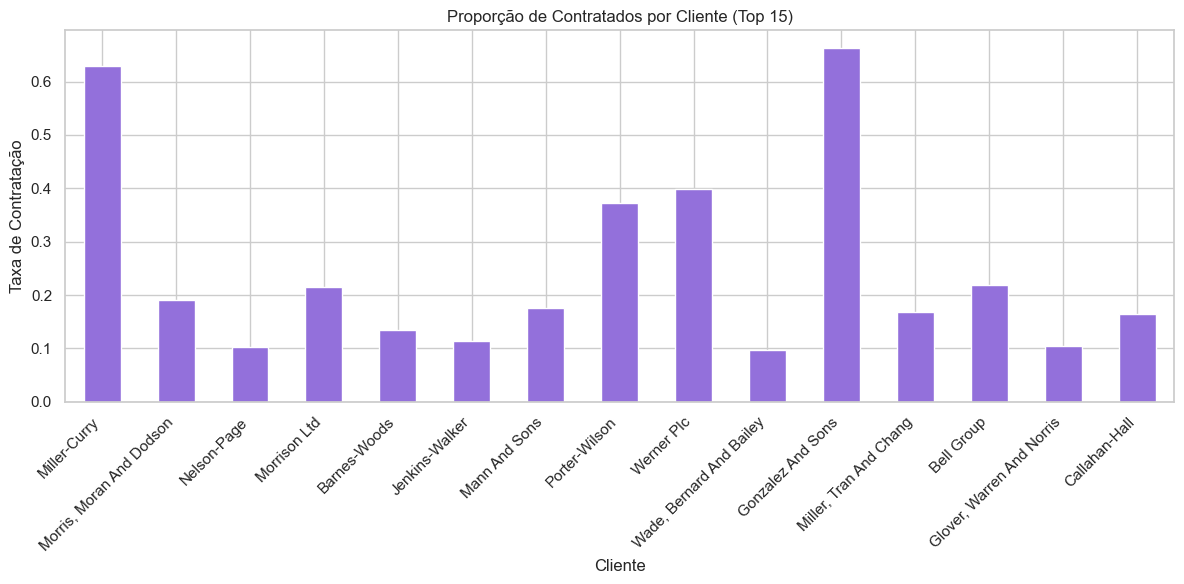

In [17]:
# Padronizar
df['cliente'] = df['cliente'].str.strip().str.title()

# Agrupar e ordenar por frequência
cliente_target = (
    df.groupby('cliente')['target']
    .agg(['count', 'mean'])
    .sort_values('count', ascending=False)
    .head(15)
)

# Plotar
plt.figure(figsize=(12, 6))
cliente_target['mean'].plot(kind='bar', title='Proporção de Contratados por Cliente (Top 15)', color='mediumpurple')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Cliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


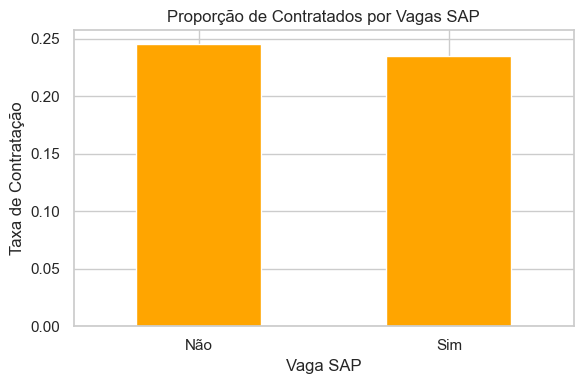

In [18]:
df['sap'] = df['sap'].str.strip().str.title()  # valores como 'Sim', 'Não', etc.

sap_target = df.groupby('sap')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sap_target.plot(kind='bar', color='orange', title='Proporção de Contratados por Vagas SAP')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Vaga SAP')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


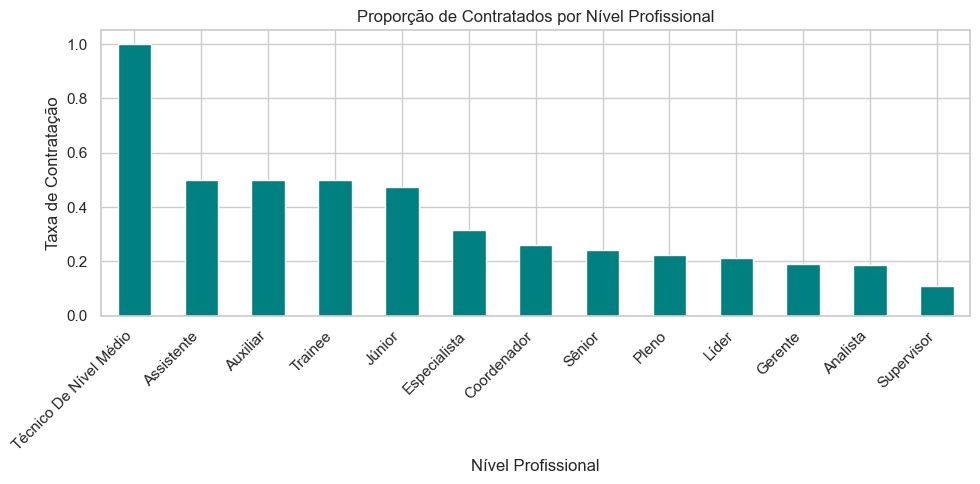

In [19]:
df['nivel_profissional'] = df['nivel_profissional'].str.strip().str.title()

nivel_prof_target = df.groupby('nivel_profissional')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
nivel_prof_target.plot(kind='bar', title='Proporção de Contratados por Nível Profissional', color='teal')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Nível Profissional')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
